In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing

In [2]:
tags=pd.read_csv(r'dataset\tag.csv')
movies=pd.read_csv(r'dataset\movie.csv')
ratings=pd.read_csv(r'dataset\rating.csv')
links=pd.read_csv(r'dataset\link.csv')

In [3]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [4]:
tags.shape

(465564, 4)

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(27278, 3)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [8]:
ratings.shape

(20000263, 4)

In [9]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
links.shape

(27278, 3)

In [11]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [12]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [13]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

In [14]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [15]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [16]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [17]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     252
dtype: int64

In [19]:
ratings.rating.describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [20]:
movies.duplicated().sum()

0

In [21]:
ratings.duplicated().sum()

0

In [22]:
links.duplicated().sum()

0

In [23]:
tags.duplicated().sum()

0

In [24]:
movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Fantasy|Horror',
       'Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Animation|Children|Comedy|Western'], dtype=object)

In [25]:
len(movies.genres.unique())

1342

In [26]:
null_rows=pd.isnull(links['tmdbId'])
links[null_rows]

,movieId,imdbId,tmdbId
140,142,94878,NaN
598,604,115978,NaN
708,720,118114,NaN
709,721,114103,NaN
718,730,125877,NaN
...,...,...,...
24323,115254,21733,NaN
24328,115279,82610,NaN
24421,115715,3670792,NaN
24445,115821,3900116,NaN


In [27]:
null_rows=pd.isnull(tags['tag'])
tags[null_rows]

,userId,movieId,tag,timestamp
373276,116460,123,NaN,2008-01-04 12:47:47
373277,116460,346,NaN,2008-01-04 13:05:46
373281,116460,1184,NaN,2008-01-04 13:11:01
373288,116460,1785,NaN,2008-01-04 13:06:46
373289,116460,2194,NaN,2008-01-04 12:44:37
373291,116460,2691,NaN,2008-01-04 12:50:02
373299,116460,4103,NaN,2008-01-04 13:05:20
373301,116460,4473,NaN,2008-01-04 12:50:40
373303,116460,4616,NaN,2008-01-04 13:14:01
373319,116460,7624,NaN,2008-01-04 13:11:06


In [28]:
movicount = pd.DataFrame(movies.groupby('genres')['genres'].count())
movicount.rename(columns = {'genres':'Count'}, inplace = True)
movicount

,Count
genres,
(no genres listed),246
Action,178
Action|Adventure,86
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,8
...,...
Thriller|War,9
Thriller|Western,2
War,32


In [29]:
tags.dropna(inplace=True)

In [30]:
tags.reset_index(drop=True)
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [31]:
movierate=pd.merge(movies,ratings,on="movieId")
movierate

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,2015-03-30 19:32:59
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0,2015-03-30 19:48:08
20000260,131258,The Pirates (2014),Adventure,28906,2.5,2015-03-30 19:56:32
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0,2015-03-30 19:57:46


In [32]:
movierate.groupby('title')['rating'].mean().reset_index()


,title,rating
0,#chicagoGirl: The Social Network Takes on a Di...,3.666667
1,$ (Dollars) (1971),2.833333
2,$5 a Day (2008),2.871795
3,$9.99 (2008),3.009091
4,$ellebrity (Sellebrity) (2012),2.000000
...,...,...
26724,À propos de Nice (1930),3.125000
26725,Árido Movie (2005),2.000000
26726,Åsa-Nisse - Wälkom to Knohult (2011),1.500000
26727,Üvegtigris (2001),3.000000


In [33]:
trendmovie=pd.DataFrame(movierate.groupby('title')['rating'].mean())
trendmovie['total no.of ratings'] = pd.DataFrame(movierate.groupby('title')['rating'].count()) 
trendmovie

,rating,total no.of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55
$ellebrity (Sellebrity) (2012),2.000000,2
...,...,...
À propos de Nice (1930),3.125000,4
Árido Movie (2005),2.000000,1
Åsa-Nisse - Wälkom to Knohult (2011),1.500000,2


In [34]:
trendmovie['total no.of ratings'].describe()

count    26729.000000
mean       748.260803
std       3086.673456
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: total no.of ratings, dtype: float64

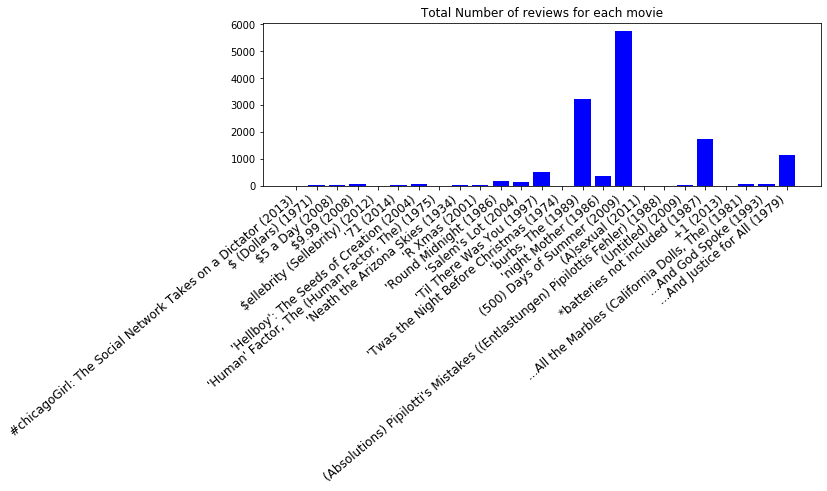

In [35]:
plt.figure(figsize =(10, 3))
ax=plt.subplot()
ax.bar(trendmovie.head(25).index,trendmovie['total no.of ratings'].head(25),color='b')
ax.set_xticklabels(trendmovie.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [36]:
type(ratings['timestamp'][0])
(ratings['timestamp'][0])

'2005-04-02 23:53:47'

In [37]:
movies['release_year'] = movies.title.str.extract("\((\d{4})\)", expand=True).astype(str)
movies

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001


In [38]:
movies.release_year=movies.release_year.astype('str')

In [39]:
movies.release_year.replace({'nan':1965},inplace=True)

In [40]:
movies.release_year=movies.release_year.astype('float')

In [41]:
movies['release_year'] = pd.to_datetime(movies.release_year, format='%Y')
movies['release_year'] = movies.release_year.dt.year
movies['title'] = movies.title.str[:-6]
movies

,movieId,title,genres,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben,Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier",Comedy,2002
27275,131258,The Pirates,Adventure,2014
27276,131260,Rentun Ruusu,(no genres listed),2001


In [42]:
movies_year_range=movies.release_year.unique()
movies_year_range.sort()
movies_year_range

array([1891, 1893, 1894, 1895, 1896, 1898, 1899, 1900, 1901, 1902, 1903,
       1905, 1909, 1910, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

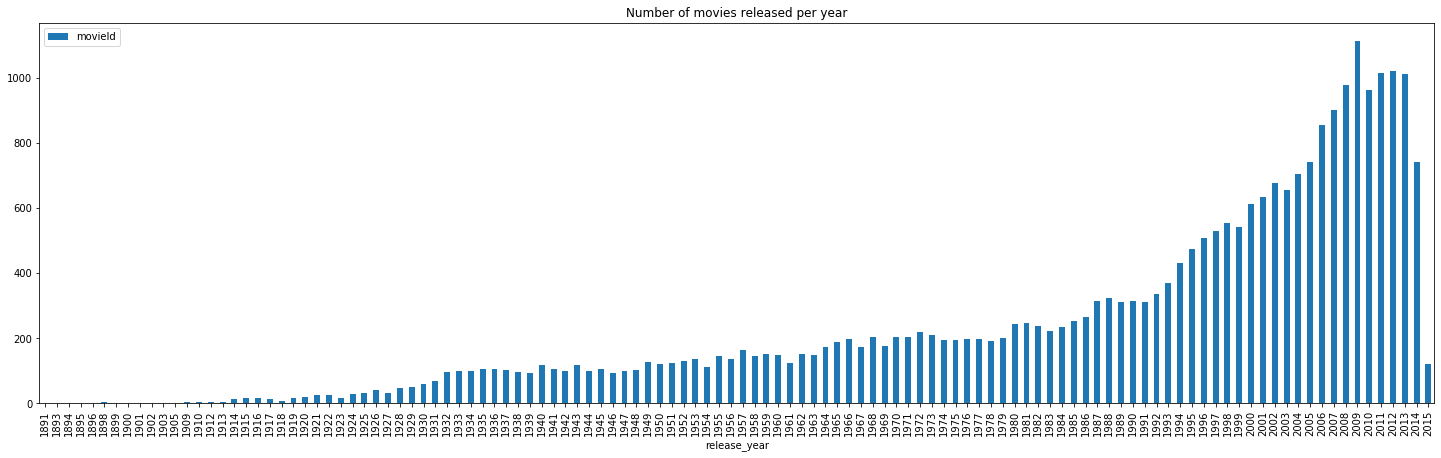

In [43]:
groupedby_year = movies[['release_year', 'movieId']].groupby(['release_year']).count().reset_index()
groupedby_year.plot.bar('release_year', 'movieId', title='Number of movies released per year', figsize=(25, 7));

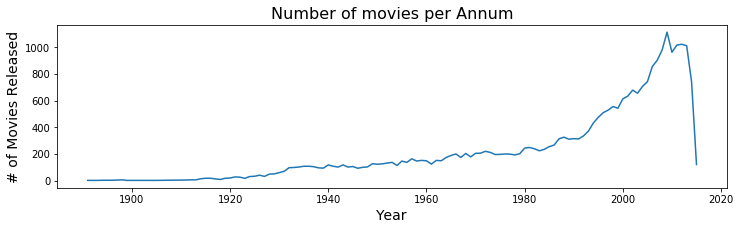

In [44]:
year_counts = movies[["title", "release_year"]].groupby("release_year").size()

fig, ax = plt.subplots(figsize=(12, 3)) 
ax.plot(year_counts.index, year_counts.values)
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("# of Movies Released", fontsize=14)
plt.show()

In [45]:
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
print('Unique genres', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

Unique genres ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


In [46]:
genre_dummies = movies.genres.str.get_dummies(sep='|') 
movies_genre_dummies = movies.join(genre_dummies) 
movies_genre_dummies.head(3)

,movieId,title,genres,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [47]:
genre_movie_count=movies_genre_dummies.sum().to_frame().iloc[3:,:]

In [48]:
genre_movie_count.reset_index(inplace=True)
genre_movie_count=genre_movie_count.iloc[1:,:]
genre_movie_count

,index,0
1,(no genres listed),246
2,Action,3520
3,Adventure,2329
4,Animation,1027
5,Children,1139
6,Comedy,8374
7,Crime,2939
8,Documentary,2471
9,Drama,13344
10,Fantasy,1412


In [49]:
genre_movie_count.rename(columns={'index':'genre',0:'count of movies'},inplace=True)

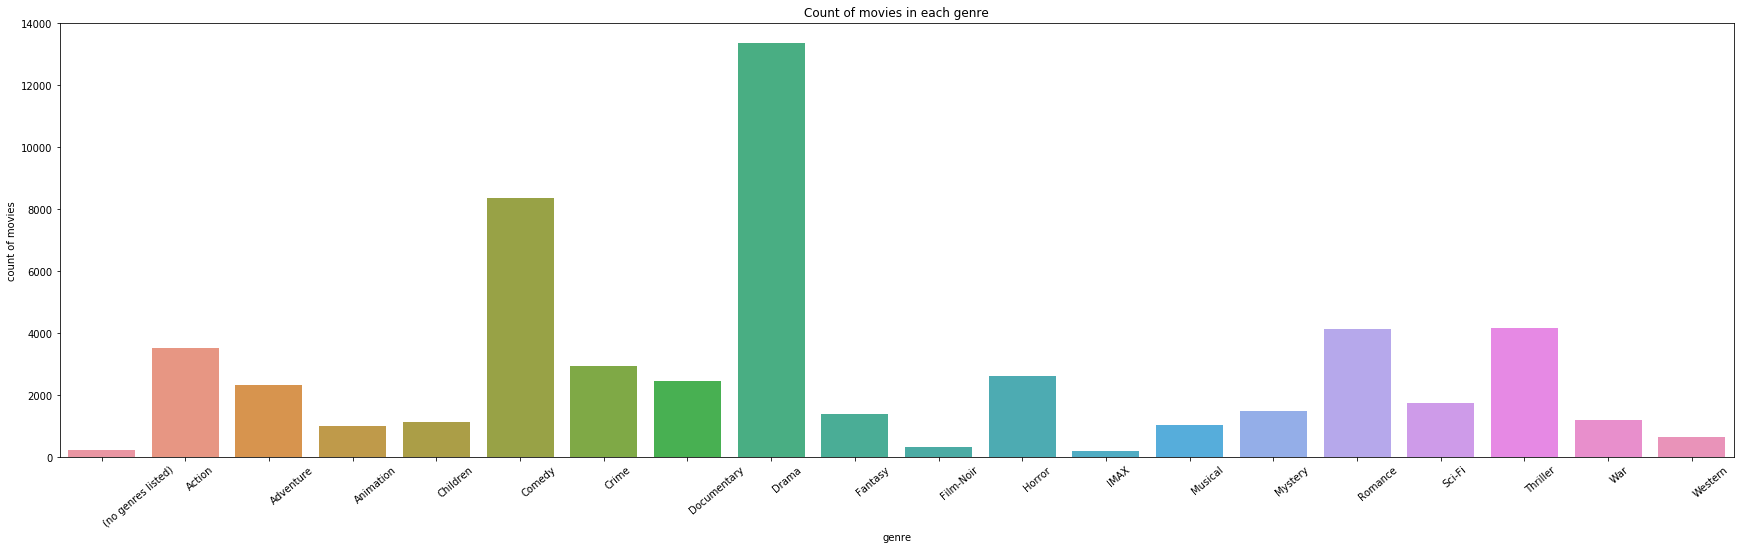

In [50]:
plt.figure(figsize=(30,8))
plt.title('Count of movies in each genre')
plt.xticks(rotation=40, ha='left');
sns.barplot(data=genre_movie_count,x='genre',y='count of movies')

In [51]:
temp=movies_genre_dummies.groupby('release_year').sum()
temp.drop(columns=['movieId'],inplace=True)

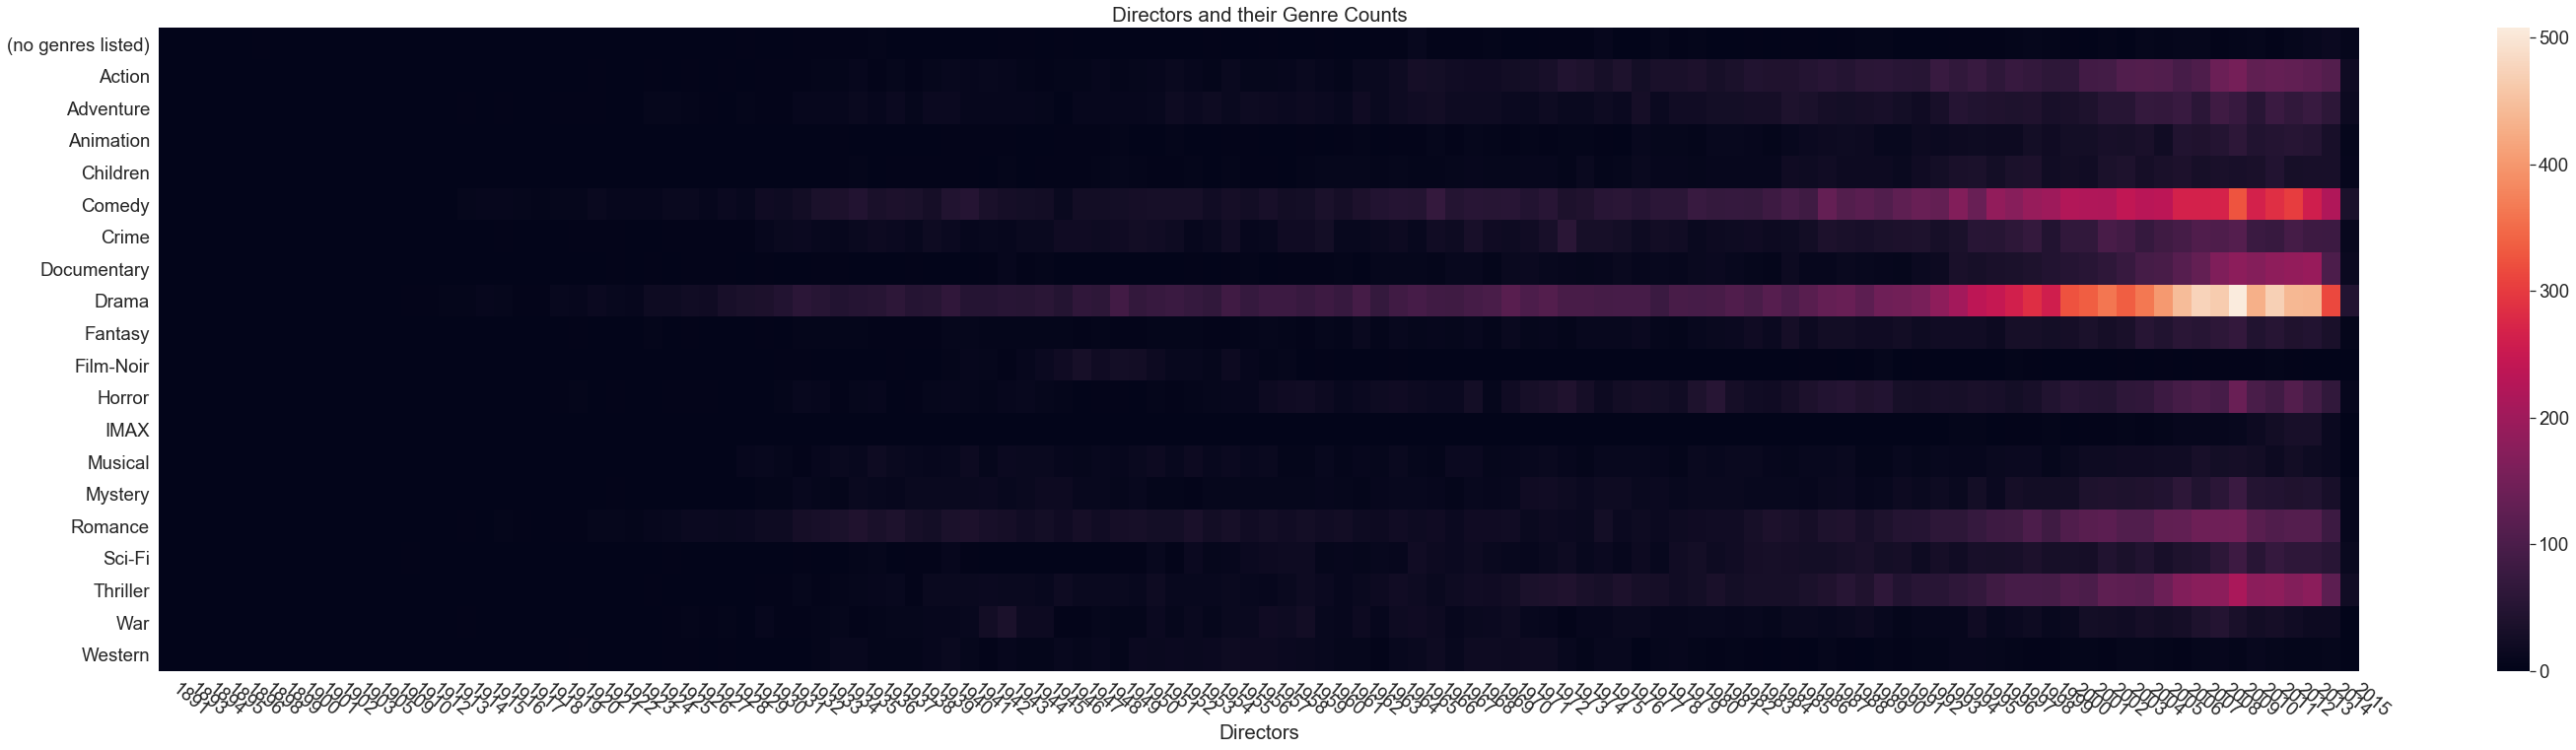

In [52]:
plt.figure(figsize=(50,12))
sns.set(font_scale=1.7)
sns.heatmap(temp.T)

plt.title('Directors and their Genre Counts')
plt.xlabel('Directors')
plt.xticks(rotation=-40, ha='left');

In [53]:
movies_genre_dummies.drop('genres', axis=1, inplace=True)

In [54]:
movies_genre_dummies

,movieId,title,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,2007,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier",2002,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27275,131258,The Pirates,2014,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu,2001,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
le=preprocessing.LabelEncoder()
tags['tag']= le.fit_transform(tags['tag'])

In [56]:
tags

,userId,movieId,tag,timestamp
0,18,4141,10912,2009-04-24 18:19:40
1,65,208,22911,2013-05-10 01:41:18
2,65,353,22911,2013-05-10 01:41:19
3,65,521,30406,2013-05-10 01:39:43
4,65,592,22911,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,23647,2013-01-23 23:29:32
465560,138446,55999,8341,2013-01-23 23:29:38
465561,138446,55999,32494,2013-01-23 23:29:38
465562,138446,55999,33409,2013-01-23 23:29:32


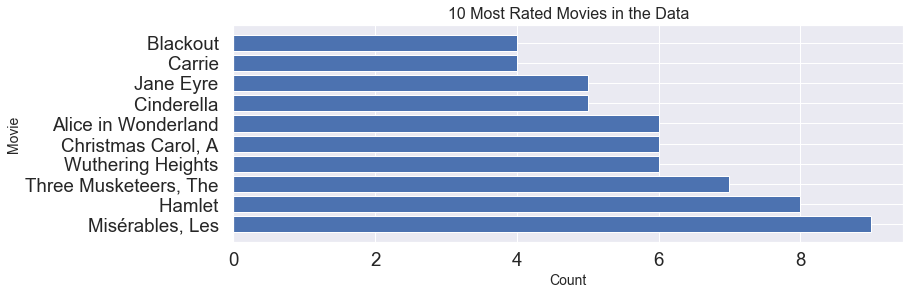

In [57]:
top_ten_movies = movies.groupby("title").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 4))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("10 Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Movie", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

In [58]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16


In [59]:
tags.head(2)

,userId,movieId,tag,timestamp
0,18,4141,10912,2009-04-24 18:19:40
1,65,208,22911,2013-05-10 01:41:18


In [60]:
user_rating_tag=pd.merge(tags,ratings,on=['userId','movieId'],how='left')
#user_rating_tag.drop(columns=['timestamp_x','year_x','month_x','date_x','timestamp_y','year_y','month_y','date_y'],inplace=True)
user_rating_tag

,userId,movieId,tag,timestamp_x,rating,timestamp_y
0,18,4141,10912,2009-04-24 18:19:40,NaN,NaN
1,65,208,22911,2013-05-10 01:41:18,NaN,NaN
2,65,353,22911,2013-05-10 01:41:19,NaN,NaN
3,65,521,30406,2013-05-10 01:39:43,NaN,NaN
4,65,592,22911,2013-05-10 01:41:18,NaN,NaN
...,...,...,...,...,...,...
465543,138446,55999,23647,2013-01-23 23:29:32,2.5,2013-01-23 23:31:05
465544,138446,55999,8341,2013-01-23 23:29:38,2.5,2013-01-23 23:31:05
465545,138446,55999,32494,2013-01-23 23:29:38,2.5,2013-01-23 23:31:05
465546,138446,55999,33409,2013-01-23 23:29:32,2.5,2013-01-23 23:31:05


In [61]:
user_rating_tag.isnull().sum()

userId             0
movieId            0
tag                0
timestamp_x        0
rating         74104
timestamp_y    74104
dtype: int64

In [62]:
user_rating_tag['rating'].fillna(user_rating_tag['rating'].mean(),inplace=True)

In [63]:
user_rating_tag.isnull().sum()

userId             0
movieId            0
tag                0
timestamp_x        0
rating             0
timestamp_y    74104
dtype: int64

In [64]:
movies_genre_dummies.head(2)

,movieId,title,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
final=pd.merge(movies_genre_dummies,user_rating_tag,on='movieId',how='right')
final.head(2)

,movieId,title,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1644,17719,2014-12-04 23:44:40,3.5,2015-01-13 07:47:23
1,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1741,22264,2007-07-08 13:59:15,4.0,2002-11-27 18:31:23


In [66]:
final.shape

(465548, 28)

In [67]:
final.isnull().sum()

movieId                   0
title                     0
release_year              0
(no genres listed)        0
Action                    0
Adventure                 0
Animation                 0
Children                  0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
IMAX                      0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
userId                    0
tag                       0
timestamp_x               0
rating                    0
timestamp_y           74104
dtype: int64

In [68]:
final.head()

,movieId,title,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1644,17719,2014-12-04 23:44:40,3.5,2015-01-13 07:47:23
1,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1741,22264,2007-07-08 13:59:15,4.0,2002-11-27 18:31:23
2,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1741,4819,2007-07-08 22:21:47,4.0,2002-11-27 18:31:23
3,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1741,13392,2007-07-08 22:46:10,4.0,2002-11-27 18:31:23
4,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,1741,17175,2009-06-15 19:19:33,4.0,2002-11-27 18:31:23


In [72]:
final_2=pd.merge(movies_genre_dummies,ratings,on='movieId',how='right')
final_2.head(2)

MemoryError: Unable to allocate 153. MiB for an array with shape (20000263, 1) and data type object

In [ ]:
# MODEL TRAINING

In [69]:
model_data = final.drop(['tag','timestamp_x','timestamp_y','title'],axis=1)

In [70]:
model_data['release_year'].min()

1893

In [ ]:
#SCALING RELEASE YEAR

In [71]:
model_data['release_year'] = model_data['release_year'] - 1893

In [72]:
X = model_data.drop('rating',axis=1)

In [73]:
y = model_data['rating']

In [ ]:
#TEST TRAIN SPLIT

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

In [ ]:
#LINEAR REGRESSION

In [77]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [78]:
prediction = linear_reg.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
mean_squared_error(y_test, prediction)

0.857968610277591

In [ ]:
#Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)

In [83]:
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
prediction_random_forest = regressor.predict(X_test)

In [85]:
mean_squared_error(y_test, prediction_random_forest)

0.2247284462428022

In [161]:
mean_sq_er_list = []
for no_of_estimators in range(1,50):
    regressor = RandomForestRegressor(n_estimators = no_of_estimators, random_state = 0)
    regressor.fit(X_train, y_train)
    prediction_random_forest = regressor.predict(X_test)
    err = mean_squared_error(y_test, prediction_random_forest)
    mean_sq_er_list.append(err)
    print("Completed",no_of_estimators,err)

Completed 1 0.38927984783612674
Completed 2 0.2873991907405792
Completed 3 0.2513085280352355
Completed 4 0.23486592389365177
Completed 5 0.2247284462428022
Completed 6 0.21761947277313862
Completed 7 0.21309911104377108
Completed 8 0.2085631856830216
Completed 9 0.2051361277023986
Completed 10 0.20274634543743103
Completed 11 0.20097629160076566
Completed 12 0.198900654479584
Completed 13 0.1978023799445176
Completed 14 0.1964963489703986
Completed 15 0.19561771732444644
Completed 16 0.19465905742895373
Completed 17 0.19384170337671033
Completed 18 0.19272781734355532
Completed 19 0.1921786320726294
Completed 20 0.19157356889605653
Completed 21 0.19091760471076058
Completed 22 0.1902542473062098
Completed 23 0.18988217334659335
Completed 24 0.18940904432660519
Completed 25 0.18898552470952157
Completed 26 0.18868018350553578
Completed 27 0.1885557990580222
Completed 28 0.1881590777156626
Completed 29 0.1880132364660221
Completed 30 0.1876808125416236
Completed 31 0.18745646737605062
C

In [162]:
x_cor = []
for i in range(1,50):
    x_cor.append(i)

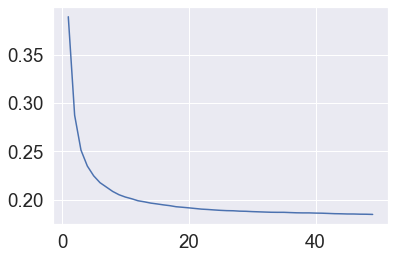

In [163]:
sns.lineplot(x=x_cor,y=mean_sq_er_list)

In [104]:
mean_sq_er_list

[0.38927984783612674,
 0.2873991907405792,
 0.2513085280352355,
 0.23486592389365177,
 0.2247284462428022,
 0.21761947277313862,
 0.21309911104377108,
 0.2085631856830216,
 0.2051361277023986]

In [314]:
from sklearn import svm

In [ ]:
svm_r = svm.SVR()
svm_r.fit(X_train, y_train)

In [ ]:
#Classification

In [86]:
model_data['rating'].value_counts()

4.000000    96296
3.780651    74104
5.000000    73491
4.500000    64642
3.500000    59036
3.000000    42361
2.500000    20236
2.000000    15724
1.500000     7302
1.000000     7014
0.500000     5342
Name: rating, dtype: int64

In [87]:
class_data = model_data

In [88]:
class_data['release_year'] = class_data['release_year']/130

In [89]:
class_data['release_year']

0         0.784615
1         0.784615
2         0.784615
3         0.784615
4         0.784615
            ...   
465543    0.930769
465544    0.930769
465545    0.930769
465546    0.930769
465547    0.930769
Name: release_year, Length: 465548, dtype: float64

In [90]:
label_encoder = preprocessing.LabelEncoder()
class_data['rating'] = label_encoder.fit_transform(class_data['rating'])

In [91]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
le_name_mapping

{0.5: 0,
 1.0: 1,
 1.5: 2,
 2.0: 3,
 2.5: 4,
 3.0: 5,
 3.5: 6,
 3.780650616691021: 7,
 4.0: 8,
 4.5: 9,
 5.0: 10}

In [92]:
X_c = class_data.drop('rating',axis=1)

In [93]:
y_c = class_data['rating']

In [94]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.25, random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_c, y_train_c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
y_pred_c = classifier.predict(X_test_c)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(y_test_c, y_pred_c)

0.2052548824181395

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test_c, y_pred_c));

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1400
           1       0.00      0.00      0.00      1754
           2       0.00      0.00      0.00      1802
           3       0.00      0.00      0.00      3905
           4       0.00      0.00      0.00      5122
           5       0.00      0.00      0.00     10606
           6       0.17      0.06      0.09     14679
           7       0.00      0.00      0.00     18466
           8       0.21      0.95      0.34     24177
           9       0.00      0.00      0.00     16187
          10       0.00      0.00      0.00     18289

    accuracy                           0.21    116387
   macro avg       0.03      0.09      0.04    116387
weighted avg       0.06      0.21      0.08    116387



In [126]:
le_name_mapping.keys()

dict_keys([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 3.780650616691021, 4.0, 4.5, 5.0])

In [127]:
inv_map = {v: k for k, v in le_name_mapping.items()}

In [128]:
inv_map

{0: 0.5,
 1: 1.0,
 2: 1.5,
 3: 2.0,
 4: 2.5,
 5: 3.0,
 6: 3.5,
 7: 3.780650616691021,
 8: 4.0,
 9: 4.5,
 10: 5.0}

In [145]:
inv_map[(y_test_c.iloc[0])]

4.0

In [141]:
y_test_c_encode = []
y_pred_c_encode = []

In [140]:
y_pred_c[0]

6

In [142]:
for i in range(len(y_test_c)):
    y_test_c_encode.append(inv_map[(y_test_c.iloc[i])])
    y_pred_c_encode.append(inv_map[(y_pred_c[i])])

In [146]:
mean_squared_error(y_test_c_encode, y_pred_c_encode)

0.9293156537899665

In [ ]:
#Naive Bayes Classifier

In [245]:
from sklearn.naive_bayes import GaussianNB

In [246]:
gnb = GaussianNB()
gnb.fit(X_train_c, y_train_c)
y_pred_c = gnb.predict(X_test_c)

In [247]:
accuracy_score(y_test_c, y_pred_c)

0.2182030639160731

In [ ]:
#Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
DT = DecisionTreeClassifier(criterion="entropy",max_depth=4)
DT.fit(X_train_c,y_train_c)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
y_pred_c = DT.predict(X_test)

In [149]:
accuracy_score(y_test_c, y_pred_c)

0.23016316255251876

In [ ]:
# Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 13) 
clf.fit(X_train_c, y_train_c)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
y_pred_c = clf.predict(X_test_c)

In [157]:
accuracy_score(y_test_c, y_pred_c)

0.8318798491240431

In [158]:
y_test_c_encode = []
y_pred_c_encode = []

for i in range(len(y_test_c)):
    y_test_c_encode.append(inv_map[(y_test_c.iloc[i])])
    y_pred_c_encode.append(inv_map[(y_pred_c[i])])
    
mean_squared_error(y_test_c_encode, y_pred_c_encode)

0.2723698205002671

In [160]:
acc = []
mean_sq_er_list_c = []
for no_of_estimators in range(1,50):
    clf = RandomForestClassifier(n_estimators = no_of_estimators) 
    clf.fit(X_train_c, y_train_c)
    
    y_pred_c = clf.predict(X_test_c)
    err = accuracy_score(y_test_c, y_pred_c)
    acc.append(err)
    
    y_test_c_encode = []
    y_pred_c_encode = []

    for i in range(len(y_test_c)):
        y_test_c_encode.append(inv_map[(y_test_c.iloc[i])])
        y_pred_c_encode.append(inv_map[(y_pred_c[i])])
    
    mse = mean_squared_error(y_test_c_encode, y_pred_c_encode)
    mean_sq_er_list_c.append(mse)
    print("Completed",no_of_estimators,'accuracy',err,'mse',mse)

Completed 1 accuracy 0.7706358957615541 mse 0.3849537264290984
Completed 2 accuracy 0.7666835643156023 mse 0.41429051301659
Completed 3 accuracy 0.7959909611898236 mse 0.3693034497150903
Completed 4 accuracy 0.8081572684234494 mse 0.3287691871241868
Completed 5 accuracy 0.8140599895177296 mse 0.31402274829332705
Completed 6 accuracy 0.8183302258843341 mse 0.30334086283465056
Completed 7 accuracy 0.8217498517875708 mse 0.2991720848961241
Completed 8 accuracy 0.8246109960734447 mse 0.28838929880814346
Completed 9 accuracy 0.827360444035846 mse 0.2826481744025803
Completed 10 accuracy 0.8283571189222164 mse 0.2799403716934095
Completed 11 accuracy 0.8298091711273596 mse 0.2796793336889107
Completed 12 accuracy 0.8333147172794212 mse 0.272069825560152
Completed 13 accuracy 0.8331772448813012 mse 0.27016468143679107
Completed 14 accuracy 0.8336841743493689 mse 0.2703116493105861
Completed 15 accuracy 0.8332373890554787 mse 0.27213869636646554
Completed 16 accuracy 0.8360126130925275 mse 0.2

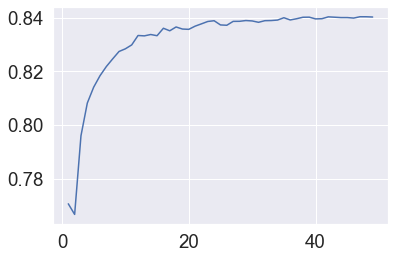

In [167]:
sns.lineplot(x=x_cor,y=acc)

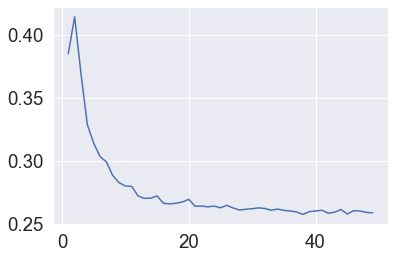

In [165]:
sns.lineplot(x=x_cor,y=mean_sq_er_list_c)

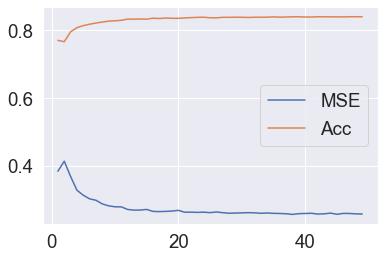

In [170]:
sns.lineplot(x=x_cor,y=mean_sq_er_list_c)
sns.lineplot(x=x_cor,y=acc)
plt.legend(['MSE','Acc'])

In [ ]:
# Recomendations to UserId1

In [188]:
X.head()

,movieId,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1644
1,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1741
2,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1741
3,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1741
4,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1741


In [204]:
movies_genre_dummies.head()

,movieId,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,102,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,102,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,102,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,102,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [194]:
movie_list = movies_genre_dummies.copy(deep=True)

In [202]:
movie_list['release_year']=movie_list['release_year']-1893

In [193]:
movie_list.drop('title',axis=1,inplace=True)

KeyError: "['title'] not found in axis"

In [189]:
movie_list['userId']=1

In [205]:
movie_list.head()

,movieId,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId
0,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,102,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,102,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,102,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,102,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Prediction using Linear Regression

In [206]:
prediction_user1 = linear_reg.predict(movie_list)

In [207]:
prediction_user1

array([3.89442875, 3.67856375, 3.74923673, ..., 3.40038942, 3.54980849,
       3.29770538])

In [208]:
movie_list['prediction'] = prediction_user1

In [209]:
movie_list

,movieId,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,prediction
0,1,102,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,3.894429
1,2,102,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3.678564
2,3,102,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,3.749237
3,4,102,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,3.938251
4,5,102,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3.763623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,114,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3.393111
27274,131256,109,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3.394088
27275,131258,121,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.400389
27276,131260,108,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.549808


In [212]:
movies_order_user1_lin = movie_list[['movieId','prediction']]

In [214]:
movie_list.drop('prediction',axis=1,inplace=True)

In [ ]:
#Random Forest Regressor

In [216]:
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [217]:
prediction_rf_user1 = regressor.predict(movie_list)

In [218]:
movie_list['prediction'] = prediction_rf_user1

In [219]:
movies_order_user1_rfr = movie_list[['movieId','prediction']]

In [220]:
movie_list.drop('prediction',axis=1,inplace=True)

In [ ]:
#Compare

In [228]:
(movies_order_user1_rfr.sort_values(by='prediction',ascending=False)).head(100)

,movieId,prediction
23665,112556,5.000000
4877,4973,5.000000
2244,2329,5.000000
2247,2332,5.000000
2873,2959,5.000000
...,...,...
7143,7255,4.853678
7181,7293,4.853678
10755,42736,4.853678
10757,42740,4.853678


In [229]:
(movies_order_user1_lin.sort_values(by='prediction',ascending=False)).head(100)

,movieId,prediction
8996,26701,4.351361
4359,4454,4.323187
4922,5018,4.307867
7006,7118,4.279489
6987,7099,4.264922
...,...,...
853,869,4.139799
6457,6567,4.138359
3413,3503,4.138342
7719,8253,4.137047


In [287]:
top_100_rfr = (movies_order_user1_rfr.sort_values(by='prediction',ascending=False)).head(10000)

In [288]:
top_100_lin = (movies_order_user1_lin.sort_values(by='prediction',ascending=False)).head(10000)

In [289]:
top_100_movieId_rfr = list(top_100_rfr['movieId'])

In [290]:
top_100_movieId_lin = list(top_100_lin['movieId'])

In [291]:
count = 0
for movie1 in top_100_movieId_rfr:
    if movie1 in top_100_movieId_lin:
        count += 1
count

4690

In [292]:
movie_already_rated_user_1 = (ratings[ratings['userId']==1]['movieId'])

In [293]:
recomendations_lin = []
for movie_id in top_100_movieId_lin:
    if movie_id not in movie_already_rated_user_1:
        recomendations_lin.append(movie_id)

In [294]:
len(recomendations_lin)

9877

In [295]:
recomendations_rfr = []
for movie_id in top_100_movieId_rfr:
    if movie_id not in movie_already_rated_user_1:
        recomendations_rfr.append(movie_id)

In [275]:
len(recomendations_rfr)

9930

In [296]:
recomendations_rfr = pd.DataFrame(recomendations_rfr, columns =['movieId'])

In [297]:
pd.merge(recomendations_rfr, movies, how='inner',on='movieId')

,movieId,title,genres,release_year
0,112556,Gone Girl,Drama|Thriller,2014
1,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le)",Comedy|Romance,2001
2,2329,American History X,Crime|Drama,1998
3,2332,Belly,Crime|Drama,1998
4,2959,Fight Club,Action|Crime|Drama|Thriller,1999
...,...,...,...,...
9925,83825,Kismet,Adventure|Fantasy,1944
9926,95628,Red's Dream,Animation|Children,1987
9927,51921,Hipnos,Horror|Thriller,2004
9928,3993,Quills,Drama|Romance,2000


In [298]:
recomendations_lin = pd.DataFrame(recomendations_lin, columns =['movieId'])

In [299]:
pd.merge(recomendations_lin, movies, how='inner',on='movieId')

,movieId,title,genres,release_year
0,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Action|Animation|Crime|Drama|Film-Noir|Mystery...,1989
1,4454,More,Animation|Drama|Sci-Fi|IMAX,1998
2,5018,Motorama,Adventure|Comedy|Crime|Drama|Fantasy|Mystery|S...,1991
3,7118,Wings of Honneamise (Ôritsu uchûgun Oneamisu n...,Animation|Drama|Sci-Fi|War,1987
4,7099,Nausicaä of the Valley of the Wind (Kaze no ta...,Adventure|Animation|Drama|Fantasy|Sci-Fi,1984
...,...,...,...,...
9872,67850,Fitna,Documentary,2008
9873,30776,Born to Dance,Comedy|Musical,1936
9874,108158,Penguin Pool Murder,Comedy|Drama|Mystery|Romance,1932
9875,87327,Camp de Thiaroye,Drama|War,1989


In [ ]:
# In case of new user there is no need for prediction
# We will just recommend based average rating

In [300]:
trendmovie=pd.DataFrame(movierate.groupby('title')['rating'].mean())
trendmovie['total no.of ratings'] = pd.DataFrame(movierate.groupby('title')['rating'].count()) 
trendmovie.sort_values(by=['rating','total no.of ratings'],ascending=False)

,rating,total no.of ratings
title,,
Catastroika (2012),5.0,2
Consuming Kids: The Commercialization of Childhood (2008),5.0,2
1971 (2014),5.0,1
A Blank on the Map (1971),5.0,1
A Gun for Jennifer (1997),5.0,1
...,...,...
"Vampir (Cuadecuc, vampir) (1971)",0.5,1
Wheelmen (2005),0.5,1
Whoregasm (1988),0.5,1


In [306]:
parameter = trendmovie['total no.of ratings'].mean()

In [307]:
trendmovie_above_par_rate = trendmovie[trendmovie['total no.of ratings']>=parameter]

In [308]:
trendmovie_above_par_rate.sort_values(by=['rating','total no.of ratings'],ascending=False)

,rating,total no.of ratings
title,,
"Shawshank Redemption, The (1994)",4.446990,63366
"Godfather, The (1972)",4.364732,41355
"Usual Suspects, The (1995)",4.334372,47006
Schindler's List (1993),4.310175,50054
"Godfather: Part II, The (1974)",4.275641,27398
...,...,...
Free Willy 3: The Rescue (1997),1.706164,941
Baby Geniuses (1999),1.703002,1399
Date Movie (2006),1.667100,769
